In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml 
from wuml import jupyter_print

ist of possible classifiers = <br>
['GP', 'SVM', 'RandomForest', 'KNN', 'NeuralNet', 'LDA', 'NaiveBayes', 'IKDR','LogisticRegression']<br>
['LDA+GP', 'LDA+SVM', 'LDA+RandomForest', 'LDA+KNN', 'LDA+NeuralNet', 'LDA', 'LDA+NaiveBayes', 'LDA+IKDR','LDA+LogisticRegression']

In [4]:
data = wuml.make_classification_data( n_samples=300, n_features=6, n_informative=3, n_classes=3)

In [5]:
jupyter_print('Running a single classifier')
cf = wuml.classification(data, classifier='LogisticRegression')
jupyter_print(cf.result_summary(print_out=False))
jupyter_print(cf.model.coef_)
jupyter_print('\nThe linear weights that designates feature importance')
jupyter_print(cf.output_sorted_feature_importance_table())
jupyter_print('We can save the classifer to file for later use')
cf.save_classifier_to_pickle_file('RL_classifier.pk')

,classifier,Train,Test
,LogisticRegression,0.756,0.8


,0,1,2,3,4,5
0,-0.098603,-0.156923,0.564376,0.019759,0.080960,0.966936
1,0.132910,0.044767,0.954546,-0.065419,0.005942,-0.580928
2,-0.034307,0.112156,-1.518922,0.045659,-0.086902,-0.386008


,Coefficients
2,0.257037
5,0.195556
1,0.003704
3,-0.000741
4,-0.000741


None


In [6]:
jupyter_print('Now we load the classifier and use it')
ikdr = wuml.pickle_load('RL_classifier.pk')
jupyter_print('You can get the labels by passing the data into the class')
ӯ = ikdr(data)
summary = wuml.summarize_classification_result(data.Y, ӯ)
jupyter_print('Avg Error: %.3f'%summary.avg_error())

,y,ŷ,Δy
0,1,0,1
1,1,2,1
2,0,0,0
3,0,0,0
4,1,2,1
...,...,...,...
295,1,1,0
296,0,0,0
297,2,0,2
298,0,0,0


In [7]:
jupyter_print('\nSorted Feature Importance')
cf.output_sorted_feature_importance_table(data.columns)
jupyter_print('\nNotice how the feature importances from LR is similar to using permutation_importance from sklearn')

,Coefficients
2,0.258519
5,0.206667
1,0.001481
4,-0.002222
3,-0.003704


In [8]:
jupyter_print('\nWe can also reduce the dimension first via LDA')
cf = wuml.classification(data, classifier='LDA+IKDR')#, reduce_dimension_first_method='LDA')
jupyter_print(cf.result_summary(print_out=False))

,classifier,Train,Test
,LDA+IKDR,0.789,0.867


In [9]:
jupyter_print('\n\nRun all classifiers sorted by Accuracy')
all_classifier = ['GP', 'SVM', 'KNN', 'NeuralNet', 'LDA', 'IKDR','LogisticRegression','LDA+GP', 'LDA+SVM', 'LDA+RandomForest', 'LDA+KNN', 'LDA+NeuralNet', 'LDA+NaiveBayes', 'LDA+IKDR','LDA+LogisticRegression']

In [10]:
models = wuml.run_every_classifier(data, y=data.Y, order_by='Test', classifiers=all_classifier)
jupyter_print(models['Train/Test Summary'])

Running LDA+LogisticRegression

,classifier,Train,Test
,GP,0.933,0.9
,IKDR,0.822,0.9
,LDA+RandomForest,0.822,0.867
,LDA,0.77,0.867
,NeuralNet,0.963,0.833
...,...,...,...
,LDA+GP,0.796,0.8
,LDA+NaiveBayes,0.774,0.8
,LogisticRegression,0.756,0.8
,LDA+LogisticRegression,0.752,0.8


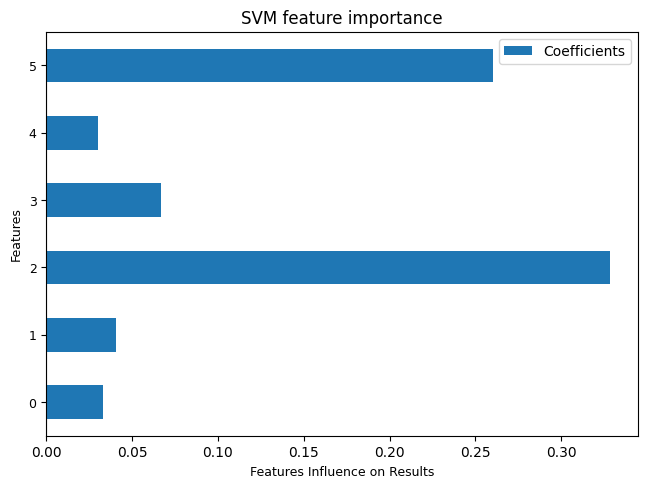

In [11]:
jupyter_print('\n\nPick out SVM and plot Feature Importance')
models['SVM'].plot_feature_importance('SVM feature importance', data.columns)